In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics

plt.style.use('seaborn')
pd.set_option('display.max_columns', 100)

In [2]:
# Loading dataset

In [3]:
data_1 = pd.read_csv('data_1.csv')

In [4]:
data_1 = data_1[['V1','V2']]

In [5]:
data = data_1.iloc[1:,:]# = 
data.columns = data_1.iloc[0]

In [6]:
data = data.astype(float)

In [7]:
#Observing data

In [8]:
data.head(10)

,density,gain
1,0.686,17.6
2,0.686,17.3
3,0.686,16.9
4,0.686,16.2
5,0.686,17.1
6,0.686,18.5
7,0.686,18.7
8,0.686,17.4
9,0.686,18.6
10,0.686,16.8


In [9]:
# Scenario 1, Fitting

In [10]:
#Use the data to fit the gain,or a transformation of gain,to density.

#Try sketching the least squares line on a scatter plot.

Text(0.5, 1.0, 'Scatter plot of the Gain and the Density data')

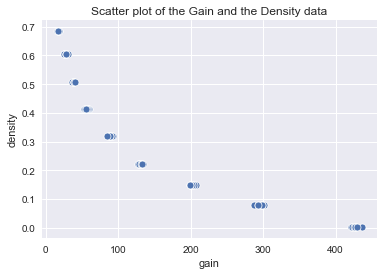

In [11]:
sns.scatterplot(data.gain, data.density)
plt.title("Scatter plot of the Gain and the Density data")

Text(0.5, 1.0, 'Scatter plot of the log-transformed Gain and the Density data')

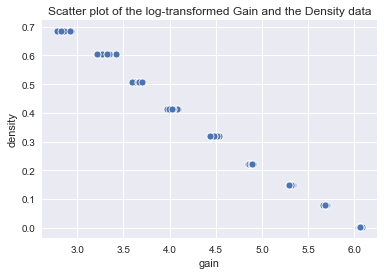

In [12]:
sns.scatterplot(np.log(data.gain), data.density)
plt.title("Scatter plot of the log-transformed Gain and the Density data")

In [13]:
temp = data.groupby('density').gain.apply(lambda x: np.log(x.mean())).to_frame().reset_index()#.plot(kind = 'scatter', x = 'density', y = 'gain')

Text(0.5, 1.0, 'Scatter plot of the mean log-transformed Gain and the Density data')

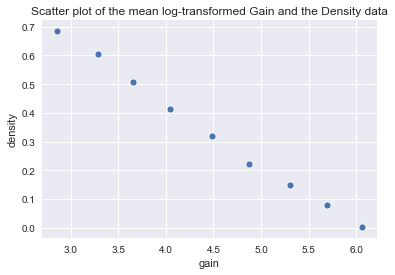

In [14]:
sns.scatterplot(temp.gain, temp.density)
plt.title("Scatter plot of the mean log-transformed Gain and the Density data")

In [15]:
# least square line and scatter plot of original data of log transformation

In [16]:
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf

In [17]:
# Least Absolute Devidations Regression Line

In [18]:
data = data.assign(logy = np.log(data.gain))

In [19]:
data.head()

,density,gain,logy
1,0.686,17.6,2.867899
2,0.686,17.3,2.850707
3,0.686,16.9,2.827314
4,0.686,16.2,2.785011
5,0.686,17.1,2.839078


In [20]:
mod = smf.quantreg('density ~ logy', data)
res = mod.fit(q=.5)

In [21]:
res.params

Intercept    1.295485
logy        -0.215571
dtype: float64

In [22]:
ladr_slope,ladr_intercept  = res.params['logy'], res.params['Intercept']

In [23]:
ladr_slope

-0.21557061687315954

In [24]:
minimum = (min(data.logy) - .1)* ladr_slope + ladr_intercept

In [25]:
maximum = (max(data.logy) + .1)* ladr_slope + ladr_intercept

In [26]:
temp = data.groupby('density').gain.apply(lambda x: np.log(x.mean())).to_frame().reset_index()#.plot(kind = 'scatter', x = 'density', y = 'gain')

In [27]:
temp

,density,gain
0,0.001,6.056081
1,0.080,5.690697
2,0.148,5.305293
3,0.223,4.872139
4,0.318,4.482890
5,0.412,4.039888
6,0.508,3.651956
7,0.604,3.293241
8,0.686,2.862772


Text(0.5, 1.0, 'Regression line for Density and log-transformed Gain')

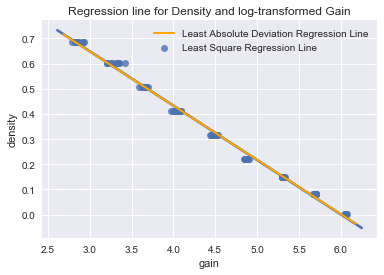

In [28]:
sns.regplot(np.log(data.gain), data.density, ci = None, label = 'Least Square Regression Line')
plt.plot([min(data.logy) - .1, max(data.logy) + .1],[minimum, maximum],linewidth=2, label = 'Least Absolute Deviation Regression Line', color = 'orange')
plt.legend()
plt.title('Regression line for Density and log-transformed Gain')

In [29]:
# Get the parameter of least square line
from scipy import stats

In [30]:
#least square line of original data
stats.linregress(data.gain, data.density)

LinregressResult(slope=-0.0015334078316468012, intercept=0.5497239543095568, rvalue=-0.9031596703485595, pvalue=4.518580918276382e-34, stderr=7.76993788865363e-05)

In [31]:
#least square line of log-transformed data
stats.linregress(np.log(data.gain), data.density)

LinregressResult(slope=-0.2162032010958118, intercept=1.2980126052584202, rvalue=-0.9979069608362691, pvalue=1.8572471194586542e-106, stderr=0.0014935062316818886)

In [32]:
#Least Absolute Deviations Regression Line
print("slope = {}".format(ladr_slope))
print("intercept = {}".format(ladr_intercept))

slope = -0.21557061687315954
intercept = 1.2954851423146152


In [33]:
slope = stats.linregress(np.log(data.gain), data.density)[0]
intercept = stats.linregress(np.log(data.gain), data.density)[1]

In [34]:
pred = np.log(data.gain) * slope + intercept

In [35]:
residuals = data.density - pred
#residuals = np.exp(residuals)

Text(0.5, 1.0, 'Residuals of Least Squares Regression Line (Log transformed)')

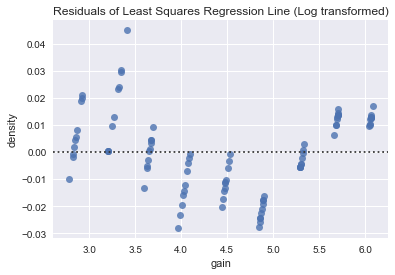

In [36]:
sns.residplot(np.log(data.gain), data.density)
plt.title('Residuals of Least Squares Regression Line (Log transformed)')

In [37]:
pred_ladr = np.log(data.gain) *ladr_slope + ladr_intercept
residuals_ladr = data.density - pred_ladr

Text(0.5, 1.0, 'Residuals of Least Absolute Deviations Regression Line (Log transformed)')

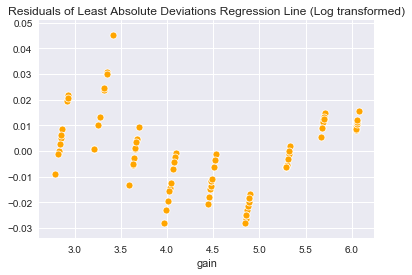

In [38]:
sns.scatterplot(np.log(data.gain), residuals_ladr, color = 'orange')
plt.title('Residuals of Least Absolute Deviations Regression Line (Log transformed)')

Text(0.5, 1.0, 'Histogram of Residuals of Least Squares Regresion Line')

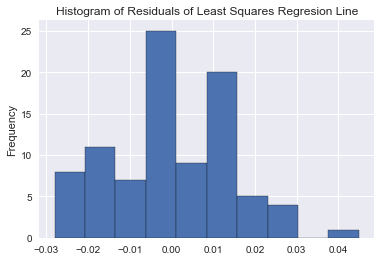

In [39]:
residuals.plot(kind = 'hist', edgecolor = 'k')
plt.title('Histogram of Residuals of Least Squares Regresion Line')

Text(0.5, 1.0, 'Histogram of Residuals of Least Absolute Deviations Regression Line')

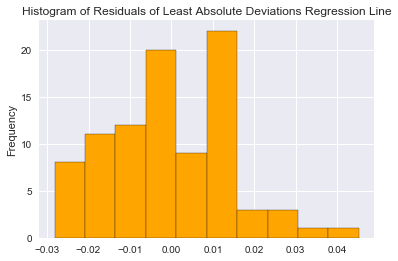

In [40]:
residuals_ladr.plot(kind = 'hist', edgecolor = 'k', color = 'orange')
plt.title('Histogram of Residuals of Least Absolute Deviations Regression Line')

In [41]:
import statsmodels.api as sm

In [42]:
# QQ plot of residuals of Least Squares Regresion Line

Text(0.5, 1.0, 'QQ plot of residuals of Least Squares Regresion Line')

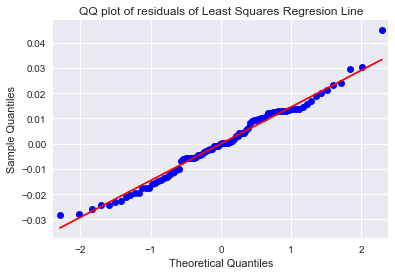

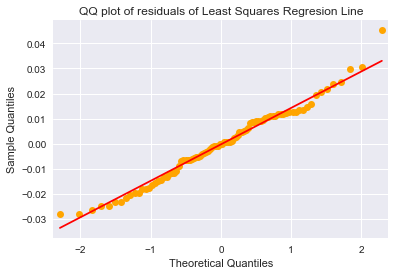

In [43]:
sm.qqplot(residuals, color = 'blue', line="s")
plt.title('QQ plot of residuals of Least Squares Regresion Line')
sm.qqplot(residuals_ladr, color = 'orange', line="s")
plt.title('QQ plot of residuals of Least Squares Regresion Line')

In [44]:
#Scenario 2, Predicting
a = 38.6 
b = 426.7

In [45]:
# plot for ls of log transformed c.i & prediction interval

In [46]:
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1]: M. Duarte.  "Curve fitting," JUpyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t*s_err*np.sqrt(1/n + (x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))
    ax.fill_between(x2, y2+ci, y2-ci, color="#b9cfe7", edgecolor="")

    return ax


def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid)-1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0/float(nboot))

    return ax

In [47]:
x = data.density
y = np.log(data.gain)

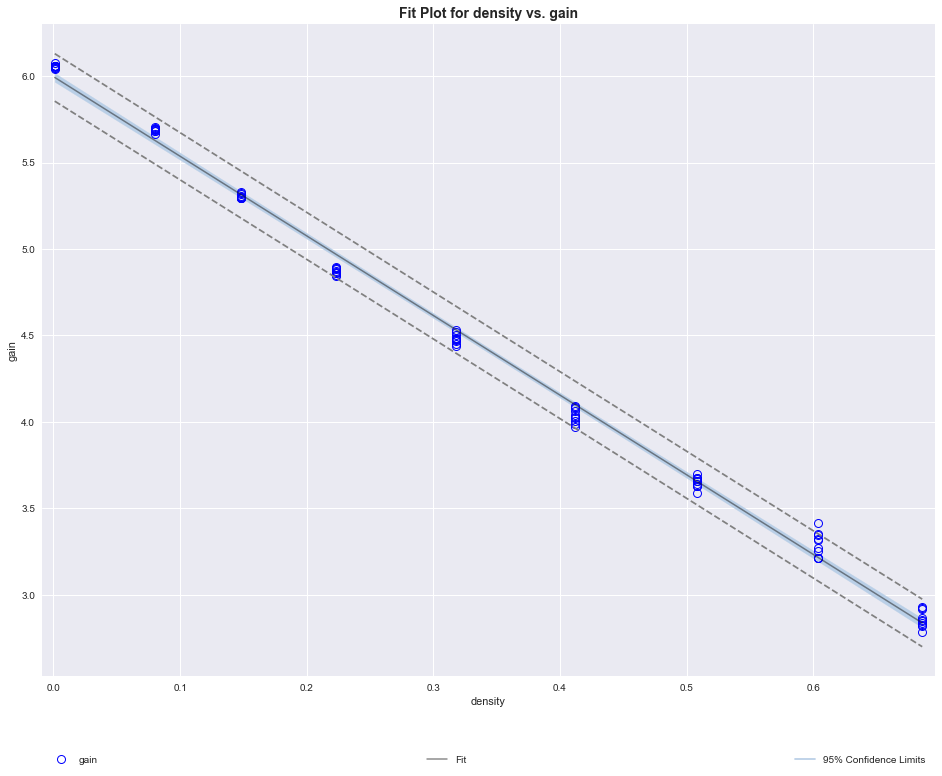

In [48]:
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 

p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = len(y)                                          # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.975, n - m)                              # used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                           
chi2 = np.sum((resid/y_model)**2)                          # chi-squared; estimates error in data
chi2_red = chi2/(dof)                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2)/(dof))                    # standard deviation of the error


# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(16, 12))

# Data
ax.plot(
    x, y, "o", color="#b9cfe7", markersize=8, 
    markeredgewidth=1, markeredgecolor="b", markerfacecolor="None"
)

# Fit
ax.plot(x,y_model,"-", color="0.1", linewidth=1.5, alpha=0.5, label="Fit")  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
#plot_ci_bootstrap(x, y, resid, ax=ax)

# Prediction Interval
pi = t*s_err*np.sqrt(1+1/n+(x2-np.mean(x))**2/np.sum((x-np.mean(x))**2))   
ax.fill_between(x2, y2+pi, y2-pi, color="None", linestyle="--")
ax.plot(x2, y2-pi, "--", color="0.5", label="95% Prediction Limits")
ax.plot(x2, y2+pi, "--", color="0.5")


# Figure Modifications --------------------------------------------------------
# Borders
ax.spines["top"].set_color("0.5")
ax.spines["bottom"].set_color("0.5")
ax.spines["left"].set_color("0.5")
ax.spines["right"].set_color("0.5")
ax.get_xaxis().set_tick_params(direction="out")
ax.get_yaxis().set_tick_params(direction="out")
ax.xaxis.tick_bottom()
ax.yaxis.tick_left() 

# Labels
plt.title("Fit Plot for density vs. gain", fontsize="14", fontweight="bold")
plt.xlabel("density")
plt.ylabel("gain")
plt.xlim(np.min(x)-.01,np.max(x)+.01)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
display = (0, 1)
anyArtist = plt.Line2D((0,1), (0,0), color="#b9cfe7")      # create custom artists
legend = plt.legend(
    [handle for i, handle in enumerate(handles) if i in display] + [anyArtist],
    [label for i, label in enumerate(labels) if i in display] + ["95% Confidence Limits"],
    loc=9, bbox_to_anchor=(0, -0.21, 1., .102), ncol=3, mode="expand"
)  
frame = legend.get_frame().set_edgecolor("0.5")

# Save Figure
#plt.tight_layout()
#plt.savefig("filename.png", bbox_extra_artists=(legend,), bbox_inches="tight")

plt.show()

In [49]:
0.508, 0.001

(0.508, 0.001)

In [50]:
#Least Square

In [51]:
lse = stats.linregress(np.log(data.gain),data.density)

In [52]:
lse

LinregressResult(slope=-0.2162032010958118, intercept=1.2980126052584202, rvalue=-0.9979069608362691, pvalue=1.8572471194586542e-106, stderr=0.0014935062316818886)

In [53]:
mod = smf.quantreg('density ~ logy', data)
res = mod.fit(q=.5)

In [54]:
#ls pred of a
pred = lse[0] * np.log(a) + lse[1]
pred

0.5081677686748749

In [55]:
#ladr pred
pred_ladr = res.params['logy'] * np.log(a) + res.params['Intercept']
pred_ladr

0.5079512954825337

In [56]:
#pi = t*lse[4]*np.sqrt(1/n+(np.log(38.6)-np.mean(x))**2/np.sum((np.log(38.6)-np.mean(x))**2)) 
pi = t*lse[4]*np.sqrt(1/n+(np.log(38.6)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [57]:
#CI of ls pred, assume known variance
me = pi
pred - me, pred + me

(0.5035380300653877, 0.5127975072843621)

In [58]:
#pi = t*lse[4]*np.sqrt(1+1/n+(np.log(38.6)-np.mean(x))**2/np.sum((np.log(38.6)-np.mean(x))**2)) 
pi = t*lse[4]*np.sqrt(1+1/n+(np.log(38.6)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [59]:
#confidence this interval contains the density of the next data point with the given gain.
me = pi
pred - me, pred + me

(0.5026683432077468, 0.513667194142003)

In [60]:
#ls pred of b
pred = lse[0] * np.log(b) + lse[1]
pred

-0.011331534157646539

In [61]:
#ladr pred of b
pred_ladr = res.params['logy'] * np.log(b) + res.params['Intercept']
pred_ladr

-0.0100280156894339

In [62]:
#pi = t*lse[4]*np.sqrt(1/n+(np.log(b)-np.mean(x))**2/np.sum((np.log(b)-np.mean(x))**2))
pi = t*lse[4]*np.sqrt(1/n+(np.log(b)-np.mean(x))**2/np.sum((x-np.mean(x))**2))

In [63]:
#CI of ls pred of b
me = pi
pred - me, pred + me

(-0.01929776563497409, -0.0033653026803189875)

In [64]:
#pi = t*lse[4]*np.sqrt(1+1/n+(np.log(b)-np.mean(x))**2/np.sum((np.log(b)-np.mean(x))**2)) 
pi = t*lse[4]*np.sqrt(1+1/n+(np.log(b)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [65]:
#prediction interval
me = pi
pred - me, pred + me

(-0.019832713183327882, -0.0028303551319651937)

In [66]:
# Scenario 3

In [67]:
a = 38.6
y = 0.508
b = 426.7

In [68]:
data = data[['density','gain']]

In [69]:
train = data[data.density!=0.508]
test = data[data.density == 0.508]

In [70]:
x = np.log(train.gain)
n = len(train)

In [71]:
lse_inverse = stats.linregress(np.log(train.gain),train.density)

In [72]:
lse_inverse

LinregressResult(slope=-0.21627808679336213, intercept=1.2984221228853379, rvalue=-0.9977772794097106, pvalue=1.6043117188534927e-93, stderr=0.00163548881591148)

In [73]:
slope, intercept = lse_inverse[0], lse_inverse[1]

In [74]:
#ls
pred = np.log(a) * slope + intercept
pred

0.5083037099567416

In [75]:
train = train.assign(logy = np.log(train.gain))

In [76]:
#ladr
mod = smf.quantreg('density ~ logy', train)
res = mod.fit(q=.5)

In [77]:
pred_ladr = res.params['logy'] * np.log(a) + res.params['Intercept']
pred_ladr

0.5070976230054155

In [78]:
#pi = t*lse_inverse[4]*np.sqrt(1/n+(np.log(38.6)-np.mean(x))**2/np.sum((np.log(38.6)-np.mean(x))**2)) 
pi = t*lse_inverse[4]*np.sqrt(1/n+(np.log(38.6)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [79]:
me = pi
pred - me, pred + me

(0.5078217464323221, 0.508785673481161)

In [80]:
#pi = t*lse_inverse[4]*np.sqrt(1 + 1/n+(np.log(38.6)-np.mean(x))**2/np.sum((np.log(38.6)-np.mean(x))**2))
pi = t*lse_inverse[4]*np.sqrt(1 + 1/n+(np.log(38.6)-np.mean(x))**2/np.sum((x-np.mean(x))**2))

In [81]:
me = pi
pred - me, pred + me

(0.5050179792716429, 0.5115894406418402)

In [82]:
train = data[data.density!=0.001]
test = data[data.density == 0.001]

In [83]:
x = np.log(train.gain)
n= len(train)

In [84]:
lse_inverse = stats.linregress(np.log(train.gain),train.density)

In [85]:
slope, intercept = lse_inverse[0], lse_inverse[1]

In [86]:
pred = np.log(b) * slope + intercept
pred

-0.018558799389517766

In [87]:
pred_ladr = res.params['logy'] * np.log(b) + res.params['Intercept']
pred_ladr

-0.00965431699749697

In [88]:
pi = t*lse_inverse[4]*np.sqrt(1/n+(np.log(b)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [89]:
me = pi
pred - me, pred + me

(-0.01940477410066668, -0.017712824678368853)

In [90]:
pi = t*lse_inverse[4]*np.sqrt(1 + 1/n+(np.log(b)-np.mean(x))**2/np.sum((x-np.mean(x))**2)) 

In [91]:
me = pi
pred - me, pred + me

(-0.022154001258395402, -0.014963597520640129)

In [92]:
#Additional Temperature, Day Of Year, and Latitude

In [120]:
addata = pd.read_csv('Full Resolution Data/64503600.csv')
addata = addata.astype(float)
addata.head()

,BuoyID,Year,Hour,Min,DOY,POS_DOY,Lat,Lon,BP,Ts
0,64503600.0,2017.0,12.0,0.0,7.500,7.500,63.0656,-5.0590,1018.6,6.19
1,64503600.0,2017.0,13.0,0.0,7.542,7.542,63.0654,-5.0358,1017.8,6.13
2,64503600.0,2017.0,14.0,0.0,7.583,7.583,63.0646,-5.0112,1017.2,6.11
3,64503600.0,2017.0,15.0,0.0,7.625,7.625,63.0654,-4.9860,1016.2,6.10
4,64503600.0,2017.0,16.0,0.0,7.667,7.667,63.0692,-4.9632,1015.6,6.08


In [178]:
X = addata.drop('Ts',axis = 1)
y = addata.Ts

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

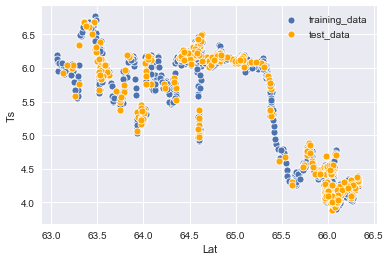

In [181]:
sns.scatterplot(x = X_train.Lat, y = y_train, label = 'training_data')
sns.scatterplot(x = X_test.Lat, y = y_test, color = 'orange', label = 'test_data')
plt.legend()

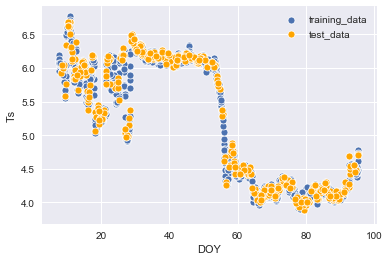

In [182]:
sns.scatterplot(x = X_train.DOY, y = y_train, label = 'training_data')
sns.scatterplot(x = X_test.DOY, y = y_test, color = 'orange', label = 'test_data')
plt.legend()

In [183]:
# First attemp w/ Temperature & DOY with linear model

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
reg = LinearRegression()

In [186]:
reg.fit(X_train['DOY'].values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [187]:
reg.score(X_test['DOY'].values.reshape(-1, 1), y_test)

0.6800581369086838

In [188]:
reg.coef_

array([-0.02947838])

In [189]:
reg.intercept_

6.723038972300083

In [190]:
ols = sm.OLS(y_train, [[1, x] for x in X_train['DOY'].values])
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ts   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     3198.
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:26:56   Log-Likelihood:                -1305.9
No. Observations:                1655   AIC:                             2616.
Df Residuals:                    1653   BIC:                             2627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7230      0.030    223.173      0.000       6.664       6.782
x1            -0.0295      0.001    -56.549      0.000      -0.031      -0.028
==============================================================================
Omnibus:                     1392.480   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.293
Skew:                           0.168   Prob(JB):                     3.05e-24
Kurtosis:                       1.793   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

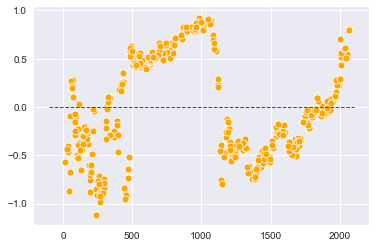

In [191]:
sns.scatterplot(y_test.index,y_test - pd.Series(reg.predict(X_test['DOY'].values.reshape(-1, 1)), \
                                                index = y_test.index), color = 'orange')

plt.plot([-100, 2100],\
         [0, 0],'--',linewidth=1, color = 'r')

In [192]:
# Second attemp w/ Temperature & Latitude with linear model

In [193]:
reg = LinearRegression()
reg.fit(X_train['Lat'].values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [194]:
reg.score(X_test['Lat'].values.reshape(-1, 1), y_test)

0.6980614541972217

In [195]:
reg.coef_

array([-0.81479453])

In [196]:
reg.intercept_

58.280898130649604

In [197]:
ols = sm.OLS(y_train, [[1, x] for x in X_train['Lat'].values])
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ts   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     3697.
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:27:03   Log-Likelihood:                -1224.9
No. Observations:                1655   AIC:                             2454.
Df Residuals:                    1653   BIC:                             2465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2809      0.873     66.740      0.000      56.568      59.994
x1            -0.8148      0.013    -60.804      0.000      -0.841      -0.789
==============================================================================
Omnibus:                      219.827   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.285
Skew:                           0.226   Prob(JB):                     1.49e-15
Kurtosis:                       2.114   Cond. No.                     4.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

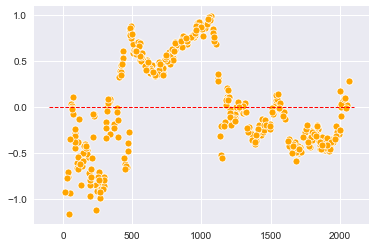

In [198]:
sns.scatterplot(y_test.index,y_test - pd.Series(reg.predict(X_test['Lat'].values.reshape(-1, 1)), \
                                                index = y_test.index), color = 'orange')
plt.plot([-100, 2100],\
         [0, 0],'--',linewidth=1, color = 'r')

In [199]:
# Third attemp w/ Temperature & DOY & Latitude with linear model

In [200]:
reg = LinearRegression()

In [201]:
reg.fit(X_train[['DOY', 'Lat']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [202]:
reg.score(X_test[['DOY', 'Lat']], y_test)

0.7087106082706318

In [203]:
reg.coef_

array([-0.00897714, -0.58582444])

In [204]:
reg.intercept_

43.8284032293733

In [205]:
ols = sm.OLS(y_train, [[1]+ list(x) for x in X_train[['DOY','Lat']].values])
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ts   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1905.
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:27:07   Log-Likelihood:                -1207.1
No. Observations:                1655   AIC:                             2420.
Df Residuals:                    1652   BIC:                             2436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8284      2.563     17.100      0.000      38.801      48.856
x1            -0.0090      0.001     -5.989      0.000      -0.012      -0.006
x2            -0.5858      0.040    -14.478      0.000      -0.665      -0.506
==============================================================================
Omnibus:                      211.899   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.352
Skew:                           0.227   Prob(JB):                     2.37e-15
Kurtosis:                       2.122   Cond. No.                     1.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

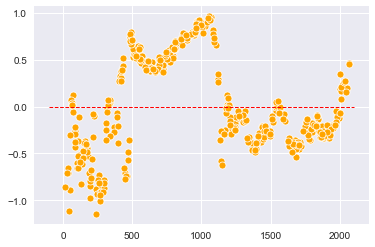

In [206]:
sns.scatterplot(y_test.index,y_test - pd.Series(reg.predict(X_test[['DOY', 'Lat']]), \
                                                index = y_test.index), color = 'orange')
plt.plot([-100, 2100],\
         [0, 0],'--',linewidth=1, color = 'r')